In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns=99

In [2]:
dataset=pd.read_csv("turkiye-student-evaluation_generic.csv")
dataset.head(30)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,1,2,1,1,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
7,1,2,1,1,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
8,1,2,1,1,3,4,4,4,4,4,4,4,4,4,4,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
9,1,2,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [3]:
dataset.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [5]:
#preprocessing
dataset.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [6]:
#set new styles for graph
plt.style.use("fivethirtyeight")

<AxesSubplot:xlabel='instr', ylabel='count'>

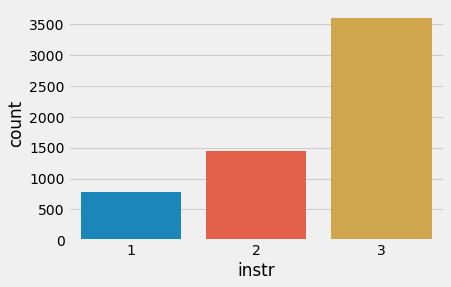

In [7]:
sns.countplot(dataset['instr'])

<AxesSubplot:xlabel='class', ylabel='count'>

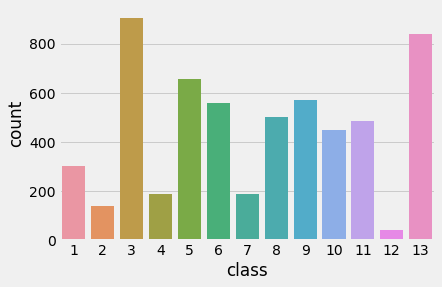

In [8]:
sns.countplot(dataset['class'])

In [9]:
#find mean of Qs
#get all rows from 5 to 33 column
X_questions=dataset.iloc[:,5:33]
q_mean=X_questions.mean(axis=0)
total_mean=q_mean.mean()

In [13]:
q_mean.head()


,index,mean
0,Q1,2.929897
1,Q2,3.073883
2,Q3,3.178694
3,Q4,3.082474
4,Q5,3.105842


<AxesSubplot:xlabel='index', ylabel='mean'>

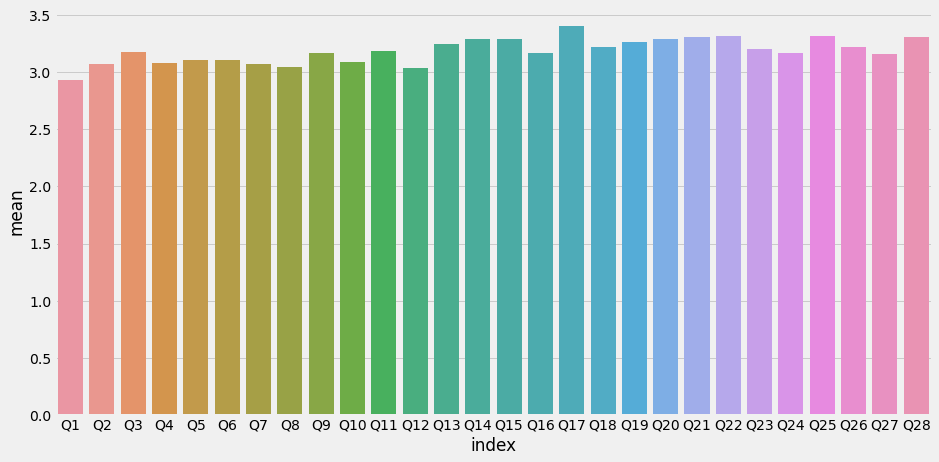

In [15]:
plt.figure(figsize=(14,7))
sns.barplot(x='index',y='mean',data=q_mean)

<AxesSubplot:>

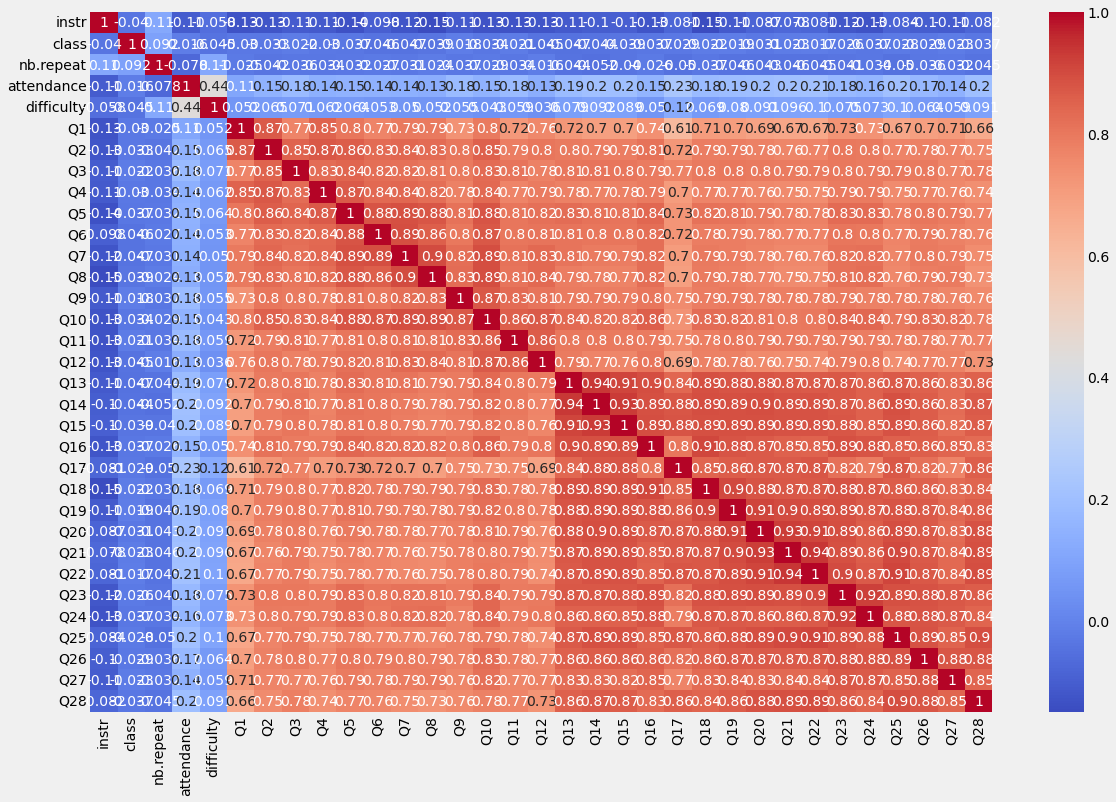

In [16]:
corr=dataset.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [21]:
#principal component analysis
X=dataset.iloc[:,5:33]
pca=PCA(n_components=2,random_state=42)
X_pca=pca.fit_transform(X)

In [22]:
#how much info we retained from dataset
pca.explained_variance_ratio_.cumsum()[1]

0.8671381678891082

In [27]:
#model

#kmeans clustering
from sklearn.cluster import KMeans
distortions=[]
cluster_range=range(1,6)
#find best model
for i in cluster_range:
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(X_pca)
    distortions.append(model.inertia_)

Text(0, 0.5, 'Distortion')

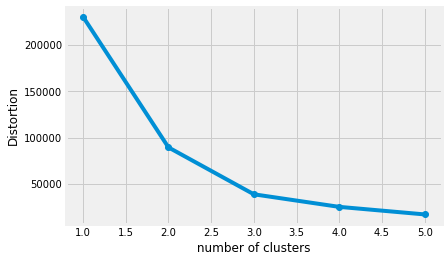

In [28]:
plt.plot(cluster_range,distortions,marker='o')
plt.xlabel(" number of clusters ")
plt.ylabel("Distortion")

In [29]:
#numer of cluster=3
model=KMeans(n_clusters=i,random_state=42)
model.fit(X_pca)
y=model.predict(X_pca)

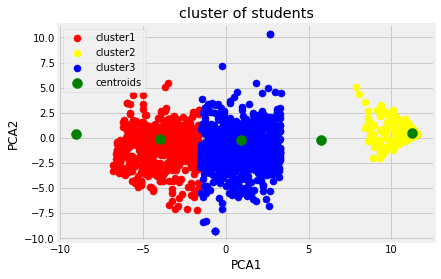

In [31]:
plt.scatter(X_pca[y==0,0],X_pca[y==0,1],s=50,c='red',label='cluster1')
plt.scatter(X_pca[y==1,0],X_pca[y==1,1],s=50,c='yellow',label='cluster2')
plt.scatter(X_pca[y==2,0],X_pca[y==2,1],s=50,c='blue',label='cluster3')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100,c='green', label='centroids')
plt.title('cluster of students')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [32]:
from collections import Counter
Counter(y)

Counter({2: 1924, 3: 848, 1: 734, 0: 1607, 4: 707})

In [33]:
model=KMeans(n_clusters=i,random_state=42)
model.fit(X)
y=model.predict(X)

In [34]:
Counter(y)

Counter({0: 1914, 1: 849, 2: 729, 4: 1609, 3: 719})

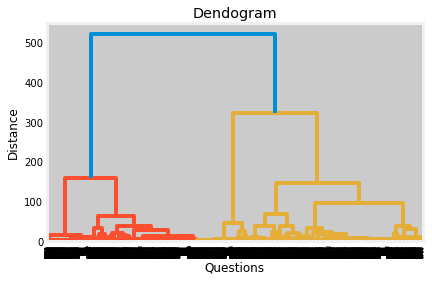

In [36]:
#dendogram
import scipy.cluster.hierarchy as hier
dendogram= hier.dendrogram(hier.linkage(X_pca,method='ward'))
#graph
plt.title('Dendogram')
plt.xlabel("Questions")
plt.ylabel("Distance")
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y=model.fit_predict(X_pca)

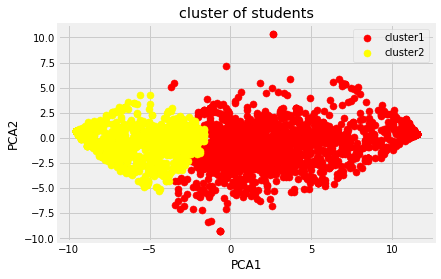

In [47]:
plt.scatter(X_pca[y==0,0],X_pca[y==0,1],s=50,c='red',label='cluster1')
plt.scatter(X_pca[y==1,0],X_pca[y==1,1],s=50,c='yellow',label='cluster2')
plt.title('cluster of students')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


In [48]:
Counter(y)

Counter({0: 3502, 1: 2318})